# Premise
Or background.

Supervisory control theory is brought up early 80s'. 

# Import packages

In [2]:
import pandas as pd
import numpy as np
import os, sys
from matplotlib import pyplot as plt
from Utility.Hygraph_json import Hyper_Read
import hypernetx as hnx

In [3]:
# load hypergraph and nodes name data
# add current directory to path
sys.path.append(os.getcwd())

node_json_path = r'./handlingcase/'
# check if route exists
if not os.path.exists(node_json_path):
    print('nodes.json not found')
    sys.exit(1)
else:
    json_files = [file for file in os.listdir(node_json_path) if file.endswith('.json')]
    print("json files are:", json_files)

# check file names and assign to node and edge json
if "edge" in json_files[0]:
    edge_json = json_files[0]
    node_json = json_files[1]
else:
    edge_json = json_files[1]
    node_json = json_files[0]

edge_path = os.path.join(node_json_path, edge_json)
node_path = os.path.join(node_json_path, node_json)
print("edge path is:", edge_path)
print("node path is:", node_path)

json files are: ['Handling_hyperedges.json', 'Handling_nodes.json']
edge path is: ./handlingcase/Handling_hyperedges.json
node path is: ./handlingcase/Handling_nodes.json


### Convert json files into node, edge data frame

In [4]:
node = Hyper_Read(node_path).js2df()
edge = Hyper_Read(edge_path).js2df()

return hyperedges data


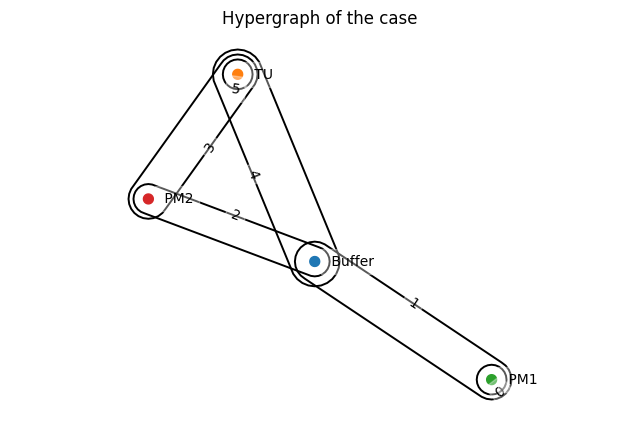

In [5]:
from Utility.data_func import Graph_conv
G1 = Graph_conv(edge, node)
graph1 = hnx.Hypergraph(G1)

from collections import defaultdict
# make a plot function
colors = defaultdict(lambda: plt.cm.tab10(len(colors)%10))
def get_node_color(v):
    return colors[v]
cmap = plt.cm.Blues
alpha = .2
sizes = np.array([graph1.size(e) for e in graph1.edges()])
norm = plt.Normalize(sizes.min(), sizes.max())

fig, axs = plt.subplots(1,1, figsize = (8, 5))
hnx.draw(graph1, 
        ax = axs,
         with_node_labels=True, 
         with_edge_labels=True, 
         node_labels_kwargs={
                'fontsize': 10
         },
         nodes_kwargs = {
             'color': get_node_color
         },
         edge_labels_kwargs = {
            'fontsize': 10,
         },
         edges_kwargs = {'linewidth':1.4,
                         'edgecolors': 'black',
        },
)
plt.title('Hypergraph of the case')
plt.show()

## Incidence matrix and adjacency matrix (Design structure matrix)

The current case (data in *handlingcase* folder) represents with relationships between components, the relationships which are established through requirements designed with engineers. <br/>

The relationships are also established when their transition rules are settled. The detail of how the case data is constructed can reference the ESCET documentation. <br/>


The source data is recorded with nodes, and edges. Their data form can be viewed as a hypergraph. A hypergraph is a special graph that allows multiple nodes on the same edge. <br/>

Hence, we can check its incidence matrix first.

The incidence matrix $H$ of a hypergraph with $|V|$ columns and $|E|$ rows, $H$, then can be expressed as:
$$
\begin{equation}
    H_{ij} =
\begin{cases}
1 & \text{if } v_i \in e_j \\
0 & \text{otherwise}.
\end{cases}
\end{equation}
$$
An adjacency matrix is a square matrix that represents the transition relationships in pairs of nodes, which are indexed by the vertices of $H$ with $\forall i, j \in V, i \neq j$, and the entry of the adjacency matrix is $a_{i,j} = |\{e \in E: i,j \in e\}|$, with $a_{i,i}=0$.

In [6]:
from Utility.Hypergraph_matrix import Hyper_matrix
w = np.ones(len(node)) # initial as unit array
H = Hyper_matrix(edge_path, node, edge, w, edge).IncidenceMatrix_H()
print("Incidence matrix is:\n", H)
mat, rindex = graph1.adjacency_matrix(s=1, index=True)
print("adjacency matrix is:\n", mat.todense())
print("Componenet index as: ",rindex)

Incidence matrix is:
 [[1 1 0 0 0 0]
 [0 0 1 1 0 0]
 [0 1 1 0 1 0]
 [0 0 0 1 1 1]]
adjacency matrix is:
 [[0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]]
Componenet index as:  [' Buffer' ' PM1' ' PM2' ' TU']


Currently, the popular variable reorder algorithms for deriving variables ordering reference the adjacency matrix, or design structure matrix, to derive the variable ordering sequence for supervisor synthesis. <br/>